<div style="display: flex; align-items: center; justify-content: space-between; background-color: #1e355f; padding: 30px;">
    <div>
        <h1 style="color: white; text-align: center; font-weight: bold;">Datos No Estructurados: NLP</h1>
        <h2 style="color: white; text-align: center;">Fake News Detection</h2>
    </div>

</div>

<div style="padding: 5px;">
    <h3 style="color: #1e355f; font-weight: bold;">Realizado por:</h3>
</div>

- Álvaro Ezquerro Pérez
- María Calvo de Mora Román
- Celia Quiles Alemañ


<div style="display: flex; align-items: center; justify-content: space-between; background-color: #1e355f; padding: 10px;">
    <div>
        <h1 style="color: white; text-align: center; font-weight: bold;">Código Inicial, Carga de datos y EDA</h1>
    </div>
</div>


<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Descripción y Objetivos:</h2>
</div>


Con este trabajo se pretende realizar un problema de NLP para **detectar cuándo una noticia se corresponde con una `fake new` y cuándo no**.

Para conseguir esta tarea, se realizará un primer análisis de los datos que usaremos, junto con la transformación necesaria para su modelización.

Con esa labor hecha, se pasará a modelizar diferentes modelos, desde modelos más tradicionales y sencillos, hasta otros más complejos.

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Análisis Inicial de los Datos:</h2>
</div>


Antes de nada, importamos todas las librerías que se necesitarán en el transcurso del trabajo.

<div style="padding: 5px;">
    <h4 style="color: #1e355f; font-weight: bold;"> Librerías necesarias:</h4>
</div>

In [4]:
#!pip install nltk
#!pip install wordcloud
#!pip install textblob

In [5]:
import numpy as np
import re
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

In [6]:
import nltk

# Paquetes específicos para análisis de texto
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/celiaquiles_/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/celiaquiles_/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/celiaquiles_/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">1) Carga de datos y breve Descripción:</h2>
</div>

In [7]:
df_fake = pd.read_csv('../data/Fake.csv')
df_true = pd.read_csv('../data/True.csv')


Los datos empleados se corresponden con noticias, tanto verdaderas como falsas, procedentes de fuentes reales. 

Estos dos datasets se han extraído de Kaggle (Fake News Detection Datasets). [1]

In [8]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
print('-- Registros totales de Fake News: --', len(df_fake))
print('-- Registros totales de Real News: --', len(df_true))

-- Registros totales de Fake News: -- 23481
-- Registros totales de Real News: -- 21417


Como se observa, el dataset que contiene todas las noticias reales contiene 21417 noticias. Por otra parte, el dataset con fake news contiene 23481 noticias. Es decir, en total contaremos con 44898 registros. 

Ambos conjuntos de datos cuentan con 4 columnas:
- `title`: titular de la noticia correspondiente
- `text` texto de la noticia
- `subject`: temática de la noticia (política, de interés mundial...)
- `date`: fecha de publicación de la notícia

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">2) Limpieza y Transformación básica inicial de los datos:</h2>
</div>

Partimos de 2 datasets, uno con noticias reales y otro con fake news. No obstante, necesitamos juntar ambos datasets para poder entrenar el modelo con ambos tipos de noticias.

Para mantener clasificados todos los registros entre si son verdaderos o no, creamos una columna `fake`que actúa como etiqueta entre si un registro es fake (será igual a 1) o si es una noticia real (será igual a 0).

Además, mezclamos todos los registros con un orden aleatorio.

In [11]:
df_true['fake'] = 0
df_fake['fake'] = 1

df = pd.concat([df_true, df_fake])
random_permutation = np.random.permutation(len(df))
df = df.iloc[random_permutation]

df.head()

,title,text,subject,date,fake
4132,Trump Stooge: Women Making Assault Claims Are...,One of Donald Trump s top campaign officials h...,News,"October 19, 2016",1
4333,Russia warns of serious consequences from U.S....,UNITED NATIONS/MOSCOW/BEIRUT (Reuters) - Russi...,politicsNews,"April 6, 2017",0
19172,Hillary Supporter MARK CUBAN Makes Most Ignora...,TMZ caught up with Mavericks owner and Hillary...,left-news,"Feb 9, 2017",1
16531,JUDGE JEANINE PIRRO: “We’re tired of being lec...,Next stop after BREXIT is the US! Judge Jeanin...,Government News,"Jun 27, 2016",1
17277,Iraqi-backed Yazidi group takes over Sinjar af...,BAGHDAD (Reuters) - An Iraqi Yazidi group affi...,worldnews,"October 17, 2017",0


Con un único conjunto de datos, comenzamos su análisis.

##### 2.1) Datos ausentes:

En primer lugar, buscaremos datos ausentes.

In [12]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

**El dataset no contiene ningún valor null.**

Veamos si, por el contrario, tiene datos duplicados.

##### 2.2) Datos duplicados:

In [13]:
df.duplicated().sum()

209

Existen 209 registros duplicados, procedemos a eliminarlos.

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(44689, 5)

##### 2.3) Identificación del input del problema:

Ya con eso chequeado, pasamos a realizar un profundo análisis de los datos de entrada.


En primer lugar, tenemos que decidir **qué va a ser el texto que actuará como input** para ser detectado como `fake new`. Dado que tenemos **tanto titular como texto de la noticia**, vamos a unir ambas columnas y este será el texto a ser analizado.

También dejaremos en el dataset las columnas texto y titular, por separado, para poder tener diversas líneas de análisis.

In [15]:
df['contenido'] = df['title'] + ' ' + df['text']
df = df[['title', 'text', 'contenido', 'fake']]

df.head()

,title,text,contenido,fake
4132,Trump Stooge: Women Making Assault Claims Are...,One of Donald Trump s top campaign officials h...,Trump Stooge: Women Making Assault Claims Are...,1
4333,Russia warns of serious consequences from U.S....,UNITED NATIONS/MOSCOW/BEIRUT (Reuters) - Russi...,Russia warns of serious consequences from U.S....,0
19172,Hillary Supporter MARK CUBAN Makes Most Ignora...,TMZ caught up with Mavericks owner and Hillary...,Hillary Supporter MARK CUBAN Makes Most Ignora...,1
16531,JUDGE JEANINE PIRRO: “We’re tired of being lec...,Next stop after BREXIT is the US! Judge Jeanin...,JUDGE JEANINE PIRRO: “We’re tired of being lec...,1
17277,Iraqi-backed Yazidi group takes over Sinjar af...,BAGHDAD (Reuters) - An Iraqi Yazidi group affi...,Iraqi-backed Yazidi group takes over Sinjar af...,0


<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">3) Análisis Exploratorio de los Datos (EDA):</h2>
</div>

En este apartado vamos a profundizar en las diferencias entre las noticias reales y falsas.

**Enfocamos el estudio en la diferencia entre noticias reales y noticias falsas, y no en general, porque al realizar un primer modelo (una simple regresión logística), llegamos a obtener una accuracy del 99%.**

**A raíz de este descubrimiento, tuvimos la necesidad de esclarecer diferencias entre ambos tipos de noticias y entender así, por qué un modelo tan sencillo ya tiene un porcentaje de acierto tan elevado.**

#### A) Longitud del texto

Comenzamos analizando si noticias fake y noticias reales tienen una extensión similar.

In [16]:
# comprobar si la longitud de la noticia cambia mucho

df_fake['len_noticia'] = df_fake['text'].str.len()
df_true['len_noticia'] = df_true['text'].str.len()

df_fake['len_titular'] = df_fake['title'].str.len()
df_true['len_titular'] = df_true['title'].str.len()

print("Extensión (caracteres) media noticias FAKE:", round(df_fake['len_noticia'].mean(), 2))
print("Extensión (caracteres) media noticias REALES:", round(df_true['len_noticia'].mean(), 2))
print("")
print("Extensión (caracteres) media titulares FAKE:", round(df_fake['len_titular'].mean(), 2))
print("Extensión (caracteres) media titulares REALES:", round(df_true['len_titular'].mean(), 2))

Extensión (caracteres) media noticias FAKE 2547.4
Extensión (caracteres) media noticias REALES 2383.28

Extensión (caracteres) media titulares FAKE 94.2
Extensión (caracteres) media titulares REALES 64.67


En primer lugar, analizamos la extensión media de texto y titulares.

- En cuanto al valor medio de caracteres en el texto de la noticia, **noticias fake y reales tienen una extensión media similar, 2547 y 2383 respectivamente. Es decir, es algo inferior en las noticias reales.**

- Sin embargo, se aprecia mejor la diferencia al analizar la extensión de los titulares. **En el caso de los titulares fake, la extensión media es hasta un 46% mayor que la extensión media de los titulares reales.**

Igualmente, veamos los histogramas para entender mejor la distribución.

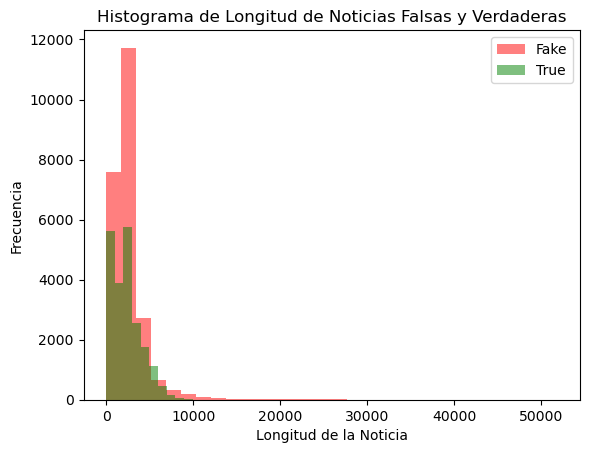

In [17]:
df_fake['len_noticia'] = df_fake['text'].str.len()
df_true['len_noticia'] = df_true['text'].str.len()

df_fake['len_titular'] = df_fake['title'].str.len()
df_true['len_titular'] = df_true['title'].str.len()

plt.hist(df_fake['len_noticia'], bins=30, color='red', alpha=0.5, label='Fake')
plt.hist(df_true['len_noticia'], bins=30, color='green', alpha=0.5, label='True')

plt.xlabel('Longitud de la Noticia')
plt.ylabel('Frecuencia')
plt.title('Histograma de Longitud de Noticias Falsas y Verdaderas')
plt.legend()

plt.show()

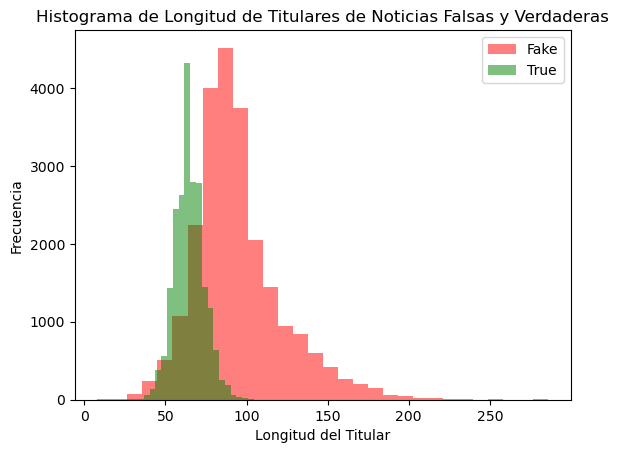

In [18]:
plt.hist(df_fake['len_titular'], bins=30, color='red', alpha=0.5, label='Fake')
plt.hist(df_true['len_titular'], bins=30, color='green', alpha=0.5, label='True')

plt.xlabel('Longitud del Titular')
plt.ylabel('Frecuencia')
plt.title('Histograma de Longitud de Titulares de Noticias Falsas y Verdaderas')
plt.legend()

plt.show()

Como ya adelantábamos en el párrafo anterior, la diferencia más significativa la encontramos cuando comparamos la extensión media de los titulares de noticias reales y falsas.

**Las noticias fake tienen titulares significativamente más largos, muy probablemente para llamar la atención del usuario.**

#### B) WordCloud

También podemos estudiar qué palabras se repiten más en cada caso, a ver si la buena clasificación se debe a ello.

In [19]:
true = df[df['fake'] == 0]
false = df[df['fake'] == 1]

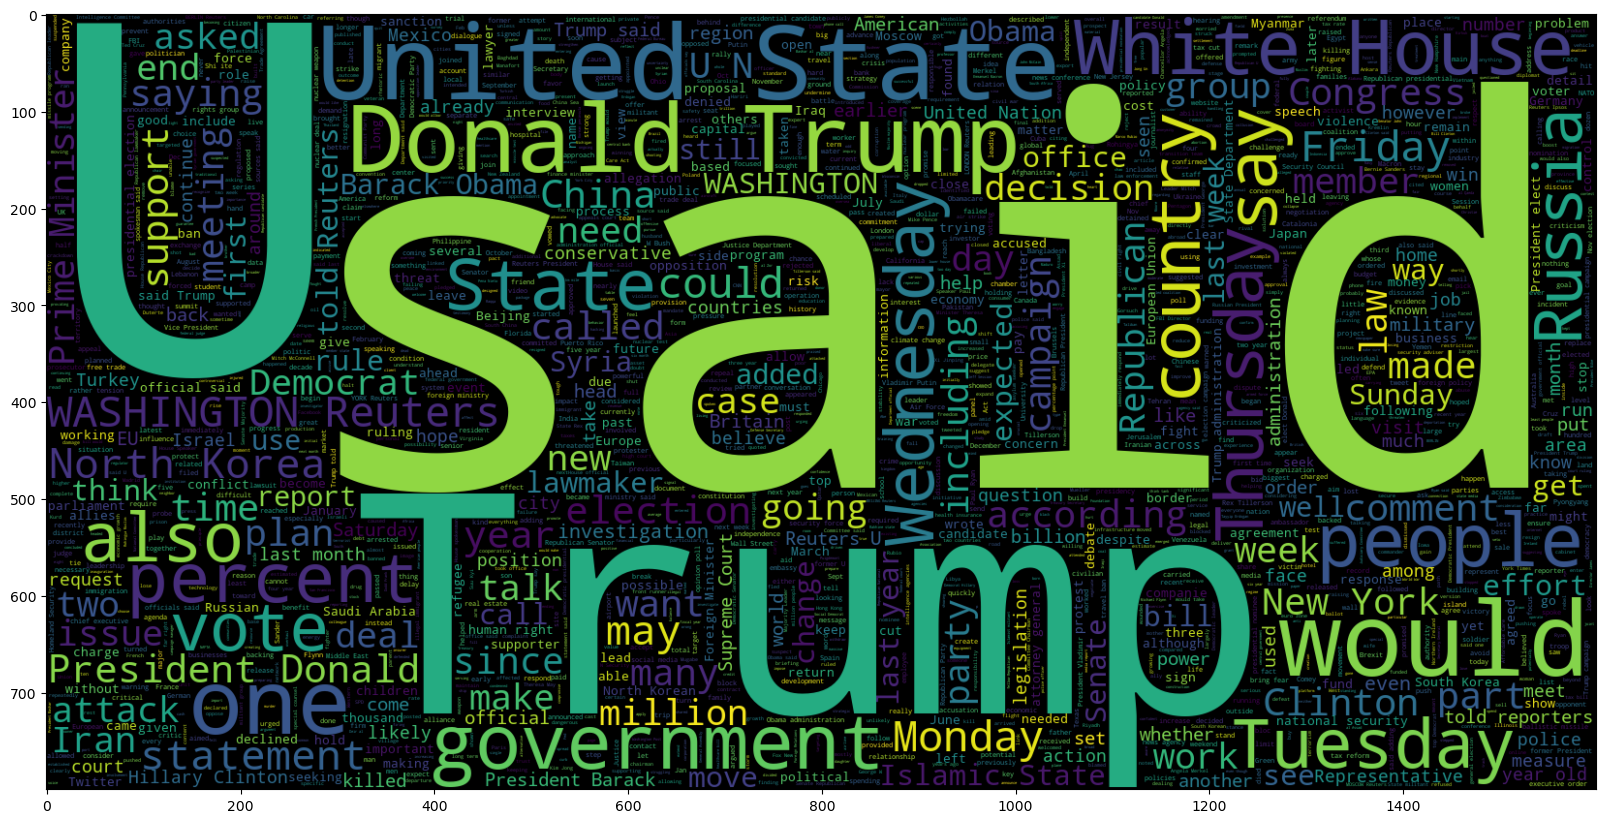

In [20]:
# ----------------------------
# --- WordCloud Real News ----
# ----------------------------

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(true.contenido))
plt.imshow(wc , interpolation = 'bilinear')

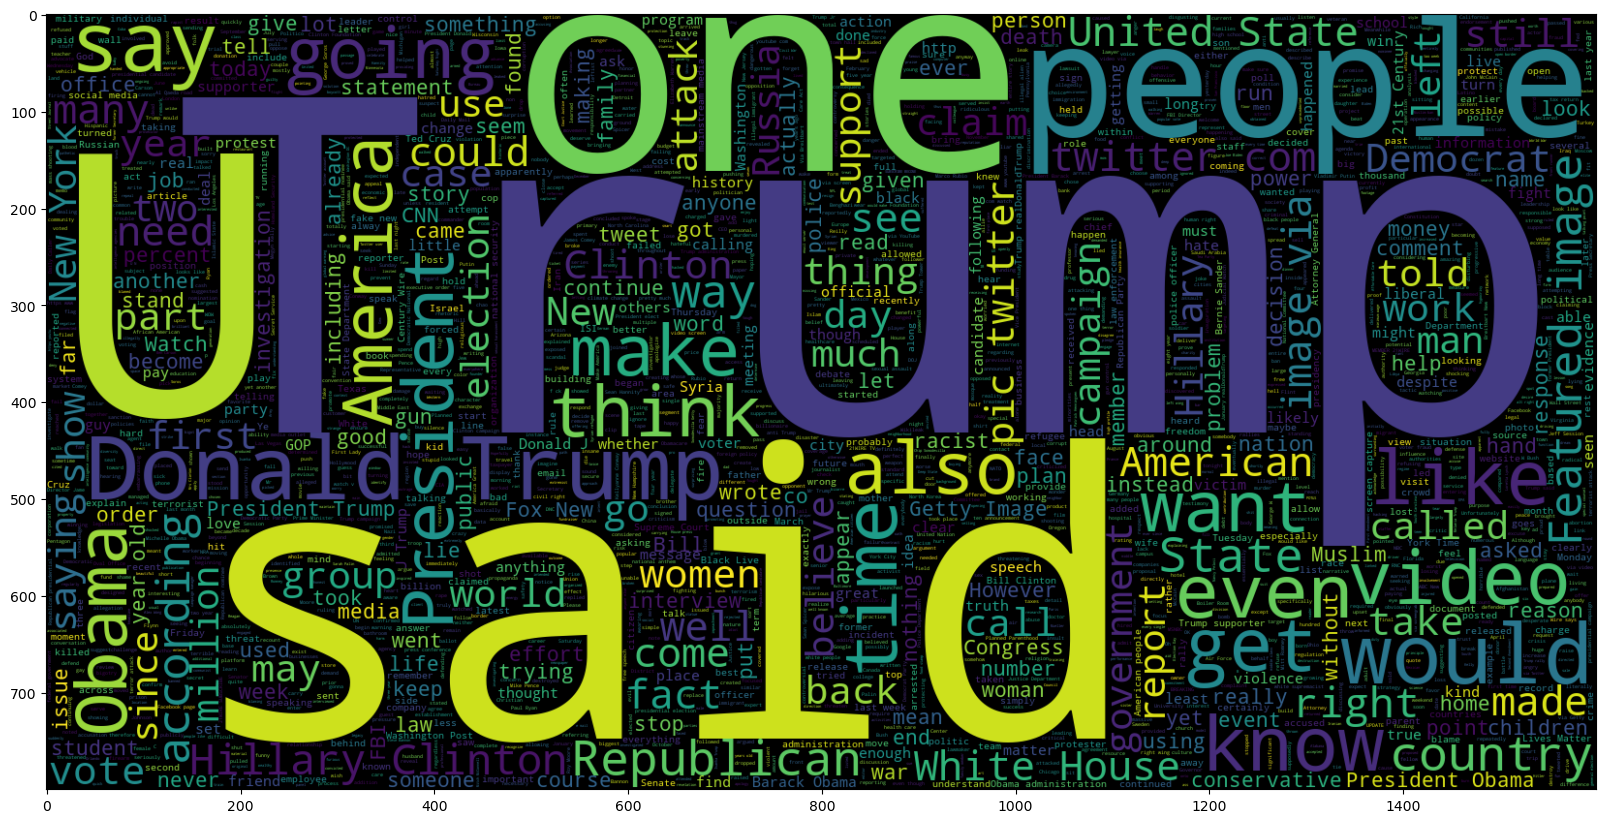

In [21]:
# ----------------------------
# --- WordCloud Fake News ----
# ----------------------------

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(false.contenido))
plt.imshow(wc , interpolation = 'bilinear')

Las nubes de palabras obtenidas no son exactamente iguales. Sin embargo, ambas tienen muchas de las palabras más habituales en común: destacan "donald", trump", "United", "state", "clinton", y muchas otras, todas relacionadas con política y, principalmente, política estadounidense.

Es decir, atendiendo solo a las palabras más habituales no logramos apreciar una clara distinción entre las noticias reales y las que no lo son.

#### C) Análisis de sentimientos

El análisis de polaridad de textos es una técnica utilizada en el procesamiento de lenguaje natural (NLP) que tiene como objetivo determinar el sentimiento asociado con un determinado texto. Esta técnica es especialmente útil en el contexto de la clasificación de textos, donde se busca identificar la orientación emocional de un documento, como positiva, negativa o neutral. [2]

Vamos a usar el algoritmo de polaridad de TextBlob para realizar el análisis. La interpretación de los resultados es que TextBlob asigna una puntuación numérica a la polaridad del texto, donde valores positivos indican un sentimiento positivo, valores negativos indican un sentimiento negativo y valores cercanos a cero indican neutralidad. 
 
Vamos a realizarlo sobre el contenido de la noticia y sobre el titular, por separado.

In [22]:
def calcular_polaridad(texto):
    return TextBlob(texto).sentiment.polarity

In [23]:
df_fake['polaridad'] = df_fake['text'].apply(calcular_polaridad)
df_true['polaridad'] = df_true['text'].apply(calcular_polaridad)

In [24]:
df_fake['polaridad_titular'] = df_fake['title'].apply(calcular_polaridad)
df_true['polaridad_titular'] = df_true['title'].apply(calcular_polaridad)

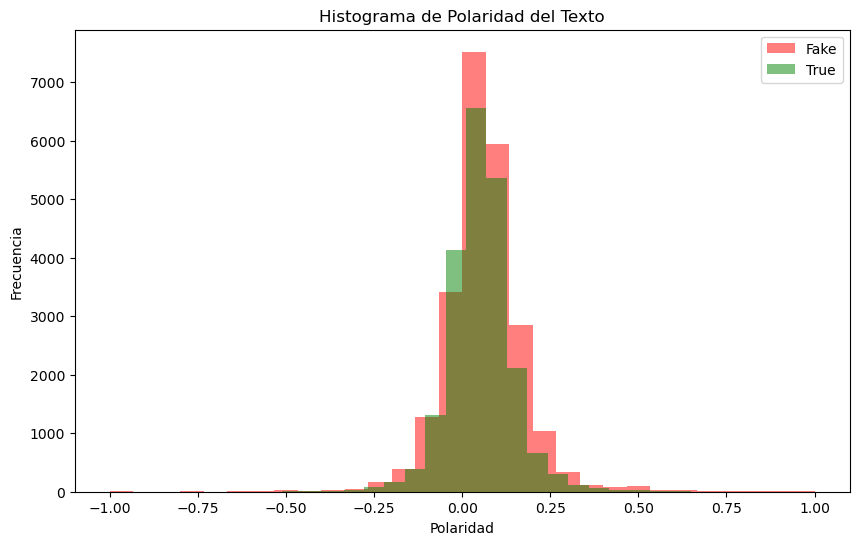

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df_fake['polaridad'], bins=30, color='red', alpha=0.5, label='Fake')
plt.hist(df_true['polaridad'], bins=30, color='green', alpha=0.5, label='True')


plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Polaridad del Texto')
plt.legend()

plt.show()

El histograma anterior representa las polaridades obtenidas sobre los textos tanto de las noticias reales (histograma verde), como de las noticias fake (histograma rojo).

Se aprecia cierta diferencia. **Las noticias fake tienen polaridades algo más extremas que las noticias reales, aunque en ambos casos, predomina la neutralidad.**

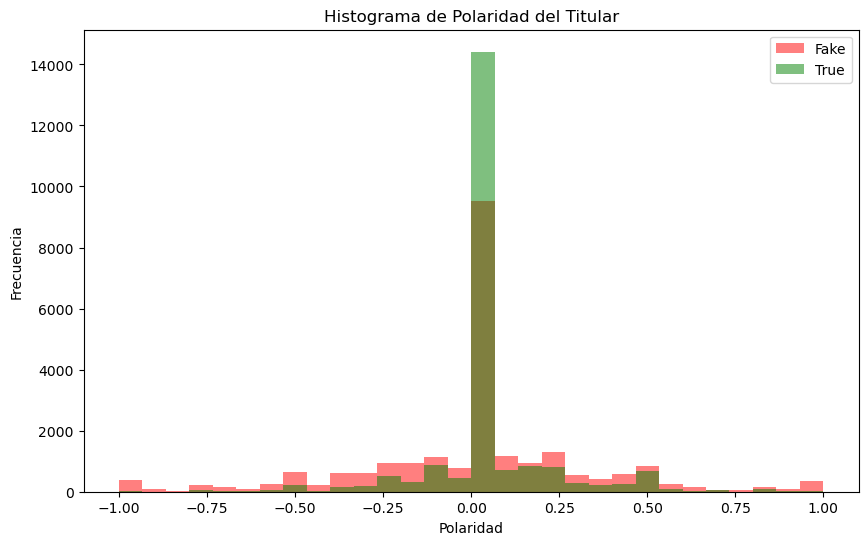

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df_fake['polaridad_titular'], bins=30, color='red', alpha=0.5, label='Fake')
plt.hist(df_true['polaridad_titular'], bins=30, color='green', alpha=0.5, label='True')


plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Polaridad del Titular')
plt.legend()

plt.show()

En el caso de este último histograma, relacionado con las polaridades de los titulares, la diferencia es más clara.

**Los titulares de las noticias reales son, en su gran mayoría, titulares completamente neutros.** Esto podría interpretarse como un reflejo de la objetividad asociada comúnmente con el periodismo real. 

No obstante, en el caso de los titulares de las noticias fake, aunque también hay muchos titulares neutros, se aprecia cómo las polaridades son mucho más variables, hay noticias claramente positivas y noticias claramente negativas. Esto se debe a que, **las fake news, con tal de llamar la atención de usuarios, pueden llegar a tener titulares menos neutros y más extremistas.**

Así que, la diferencia en la polaridad de los titulares nos da una pista sobre qué tan creíbles podrían ser las noticias. Las verdaderas suelen ser más neutrales, mientras que las falsas pueden ser más emocionales y sensacionalistas.

#### D) Patrones en el texto de las noticias

Ya, en última instancia, vamos a comparar cuál es la estructura en el titular, y en el texto de ambos conjuntos de datos.

In [27]:
df_true['title'].head()

0    As U.S. budget fight looms, Republicans flip t...
1    U.S. military to accept transgender recruits o...
2    Senior U.S. Republican senator: 'Let Mr. Muell...
3    FBI Russia probe helped by Australian diplomat...
4    Trump wants Postal Service to charge 'much mor...
Name: title, dtype: object

In [28]:
df_fake['title'].head()

0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
Name: title, dtype: object

In [29]:
df_true['text'].head()

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
Name: text, dtype: object

In [30]:
df_fake['text'].head()

0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
2    On Friday, it was revealed that former Milwauk...
3    On Christmas day, Donald Trump announced that ...
4    Pope Francis used his annual Christmas Day mes...
Name: text, dtype: object

A la hora de comparar titulares, no existe una evidente diferencia.

No obstante, en cuanto al texto de la noticia sí que observa un patrón entre las noticias reales, el cual no se repite entre las fake new:

**Las noticias reales comienzan todas con un `"WASHINGTON (Reuters)"`/ `"... (Reuters)"` o `"The following statements..."`.**

Muy probablemente este es el motivo por el cual un modelos tan sencillo como una regresión logística clasificaba tan bien, porque las noticias reales tienen un patrón repetido.

### Arreglo dataset noticias reales:

**Como consecuencia del último descubrimiento, decidimos quitar la parte inicial de los textos de noticias reales, y ya aplicamos todo el preprocesado que ya hicimos anteriormente.**

In [31]:
df_true_arreglado = df_true['text'].str.split('-', n=1, expand=True)
df_true_arreglado.columns = ['inicio', 'text']
df_true_arreglado['text'] = df_true_arreglado['text'].str.split('-').apply(lambda x: ' '.join(x) if isinstance(x, list) else '')


df_true_arreglado[['title','subject', 'date']] = df_true[['title','subject', 'date']]
df_true_arreglado.head(10)

,inicio,text,title,subject,date
0,WASHINGTON (Reuters),The head of a conservative Republican faction...,"As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017"
1,WASHINGTON (Reuters),Transgender people will be allowed for the fi...,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017"
2,WASHINGTON (Reuters),The special counsel investigation of links be...,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017"
3,WASHINGTON (Reuters),Trump campaign adviser George Papadopoulos to...,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017"
4,SEATTLE/WASHINGTON (Reuters),President Donald Trump called on the U.S. Pos...,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017"
5,"WEST PALM BEACH, Fla./WASHINGTON (Reuters)",The White House said on Friday it was set to ...,"White House, Congress prepare for talks on spe...",politicsNews,"December 29, 2017"
6,"WEST PALM BEACH, Fla (Reuters)",President Donald Trump said on Thursday he be...,"Trump says Russia probe will be fair, but time...",politicsNews,"December 29, 2017"
7,The following statements were posted to the ve...,While the Fake News loves to talk about my so...,Factbox: Trump on Twitter (Dec 29) - Approval ...,politicsNews,"December 29, 2017"
8,The following statements were posted to the ve...,"Together, we are MAKING AMERICA GREAT AGAIN! ...",Trump on Twitter (Dec 28) - Global Warming,politicsNews,"December 29, 2017"
9,WASHINGTON (Reuters),Alabama Secretary of State John Merrill said ...,Alabama official to certify Senator-elect Jone...,politicsNews,"December 28, 2017"


A continuación, hago rápidamente los cambios hechos hasta ahora.

In [32]:
df_true_arreglado['fake'] = 0
df_fake['fake'] = 1

df_true_arreglado = df_true_arreglado[['title','subject', 'date', 'text', 'fake']]

df = pd.concat([df_true_arreglado,df_fake])

random_permutation = np.random.permutation(len(df))
df = df.iloc[random_permutation]

df['contenido'] = df['title'] + ' ' + df['text']
df = df[['title', 'text', 'contenido', 'fake']]

df.head()

,title,text,contenido,fake
19916,"Turkey, Iran and Russia to deploy observers ar...","Russia, Iran and Turkey will post observers o...","Turkey, Iran and Russia to deploy observers ar...",0
1035,Senator Flake expects more Republicans to deno...,U.S. Senator Jeff Flake said on Wednesday he ...,Senator Flake expects more Republicans to deno...,0
16171,U.S. envoy Haley's blunt diplomacy targets Sou...,In a mountainous camp for displaced Congolese...,U.S. envoy Haley's blunt diplomacy targets Sou...,0
6833,Trump Supporter Holds Armed Anti-Muslim Rally...,Donald Trump s bigoted anti-Muslim rhetoric ha...,Trump Supporter Holds Armed Anti-Muslim Rally...,1
6115,WATCH: Trump’s Campaign Manager Gets Brutally...,"Donald Trump s campaign manager, Corey Lewando...",WATCH: Trump’s Campaign Manager Gets Brutally...,1


Guardo estos datos para continuar con ellos desde el notebook número 2.

In [33]:
#df.to_csv('../data/df_salida_notebook1.csv', index = False)

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">4) Preprocesado de datos para NLP:</h2>
</div>

Este apartado lo incluimos en el siguiente notebook `2.Preprocess_for_NLP`.

---
---

<div style="padding: 5px;">
    <h2 style="color: #1e355f; font-weight: bold;">Referencias:</h2>
</div>


[1] Fake news Detection datasets. (2022, 7 diciembre). Kaggle. https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets

[2] ¿Qué es el análisis de sentimiento? | Una guía completa del análisis de sentimiento. (s. f.). Elastic. https://www.elastic.co/es/what-is/sentiment-analysis